In [106]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log

from IPython.display import display
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [88]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [89]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 2

$$ \left\{
    \begin{array}{ll}
        \frac{dx_1}{dt} = x_1.(\alpha − \beta.x_2) \\
        \frac{dx_2}{dt} = -x_2.(\gamma - \delta.x_1) 
    \end{array}
    \right. $$
    
$$ dx_1 = x_1(t+dt) - x_1(t) $$
$$ dx_2 = x_2(t+dt) - x_2(t) $$

In [90]:
xmax = 1
ymax = 1
dx = 0.1
dy = 0.1
Nx = int(xmax/dx)+1
Ny = int(ymax/dy)+1

dt = dx

#### Question 1

Interprétation des termes des équations :
- $\alpha$ : coefficient de reproduction des proies
- $\beta$ : taux de mortalité des proies, à cause des prédateurs
- $\gamma$ : mortalité des prédateurs en l'absence de proies
- $\delta$ : coefficient de reproduction des prédateurs grâce à la présence de proies

Les points d'équilibre vérifient :
$$ \left\{
    \begin{array}{ll}
        x_1.(\alpha − \beta.x_2) = 0 \\
        -x_2.(\gamma - \delta.x_1) = 0 
    \end{array}
    \right. $$



Les points d'équilibre sont donc :
- $(0,0)$ qui est instable. En effet, on étudie la fonction $f : (x_1,x_2) \mapsto (x_1.(\alpha - \beta .x_2), -x_2.(\gamma - \delta . x_1))$ qui est continûment différentiable (par théorèmes généraux). Sa matrice jacobienne en $(0,0)$ est 

$$J_f(0,0) = 
 \begin{pmatrix}
     \alpha & 0 \newline
     0 & -\delta
  \end{pmatrix} 
$$ 

dont les valeurs propres sont $\alpha > 0$ et $-\delta < 0$. $(0,0)$ est donc instable par théorème de lien entre stabilité et stabilité du linéarisé tangent.
- $\overline{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ dont on ne peut pour l'instant rien dire avec le théorème ci-dessus. En effet, avec la même fonction $f$ : 

$$J_f(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}) = 
 \begin{pmatrix}
     0 & -\frac{\beta\gamma}{\delta} \newline
     \frac{\alpha\delta}{\beta} & 0
  \end{pmatrix} 
$$

dont les valeurs propres sont des imaginaires purs : $+i\sqrt{\alpha\gamma}$ et $-i\sqrt{\alpha\gamma}$.

#### Question 2

In [91]:
X = np.linspace(0, xmax, Nx)
Y = np.linspace(0, ymax, Ny)
X, Y = np.meshgrid(X, Y)
U = X*(1+dt*(alpha-beta*Y))
V = Y*(1-dt*(gamma-delta*X))

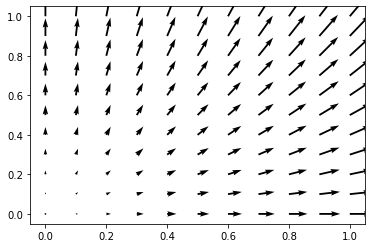

In [92]:
# champ de vecteur
plt.quiver(X,Y,U,V);

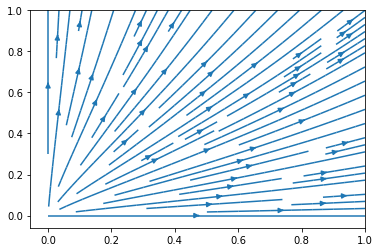

In [104]:
# portrait de phase
plt.streamplot(X,Y,U,V);

#### Question 3

Soit $(x_1,x_2)$ une solution des équations de Lotka-Vloterra, initialisée à $t_0$ dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$. On montre que sur son ensemble de définition, cette solution reste dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$.

Par l'absurde, supposons qu'il existe un temps $t' > t_0$ tq $x_1(t') \leq 0$ ou $x_2(t') \leq 0$. Par continuité de la solution, et puisque $x_1(t_0) > 0$ et $x_2(t_0) > 0$, il existe $t_1$ tq $x_1(t_1) = 0$ ou $x_2(t_1) = 0$.
- si $(x_1(t_1), x_2(t_1)) = (0,y)$, on vérifie que $(t \mapsto 0, t \mapsto y.e^{\gamma(t_1 - t)})$ est solution. De plus, $f : (a,b) \mapsto (a.(\alpha - \beta .b), -b.(\gamma - \delta . a))$ est différentiable et  

$$J_f(a,b) = 
 \begin{pmatrix}
     \alpha - \beta b & -\beta a \newline
     \delta b & \delta a - \gamma
  \end{pmatrix} 
$$

ce qui assure sa continue différentiabilité par rapport à (a,b). Cette solution est unique par théorème de Cauchy-Lipschitz. On a alors $x_1(t_0) = 0$, ce qui contredit les hypothèses.
- de la même manière, si $(x_1(t_1), x_2(t_1)) = (y,0)$, l'unique solution est $(t \mapsto y.e^{\gamma(t_1 - t)}, t \mapsto 0)$, ce qui mène à une contradiction.

On a bien montré le résultat.

#### Question 4

On étudie la fonction $H : (x_1,x_2) \mapsto \delta x_1 - \gamma \ln(x_1) + \beta x_2 - \alpha \ln(x_2)$ le long des solutions
initialisées dans $\mathbb{R}_+^* \times \mathbb{R}_+^*$ :

$$\frac{dH}{dt} = \delta \frac{dx_1}{dt} - \frac{\gamma}{x_1} \frac{dx_1}{dt} + \beta \frac{dx_2}{dt} - \frac{\alpha}{x_2} \frac{dx_2}{dt} = 0$$

$H$ est constante, donc la solution $(x_1, x_2)$ est bornée, et est donc définie sur $\mathbb{R}$.

#### Question 5

In [94]:
def H(x1, x2):
    return delta*x1 - gamma*log(x1) + beta*x2 - alpha*log(x2)

<ipython-input-94-de4b50f781c1>:2: RuntimeWarning: divide by zero encountered in log
  return delta*x1 - gamma*log(x1) + beta*x2 - alpha*log(x2)


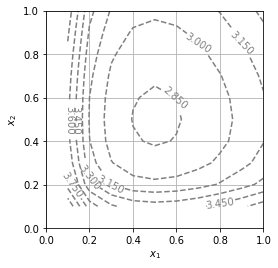

In [95]:
display_contour(
    H, 
    x=np.linspace(0, xmax, Nx), 
    y=np.linspace(0, ymax, Ny), 
    levels=10
)

#### Question 6

In [96]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    N = int((tf-t0)/dt) + 1
    t = np.linspace(t0,tf,N)
    x = [x0]
    for i in range(N-1):
        x.append(x[i] + dt*f(t[i],x[i]))
    return t, np.array(x)

In [97]:
#test

#### Question 7

In [98]:
def LotkaVolterra(t,x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha-beta*x2) , -x2*(gamma-delta*x1)])

In [99]:
t,x = solve_euler_explicit(LotkaVolterra,np.array([1,1]),0.01,0,50)

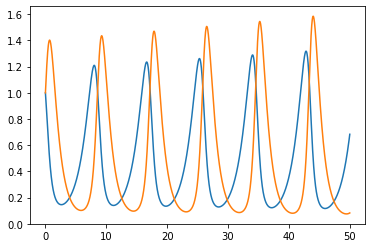

In [100]:
plt.plot(t,x);

In [101]:
proies = np.array([x[i][0] for i in range(x.shape[0])])
pred = np.array([x[i][1] for i in range(x.shape[0])])
proies, pred = np.meshgrid(proies,pred)
Z = H(proies,pred)

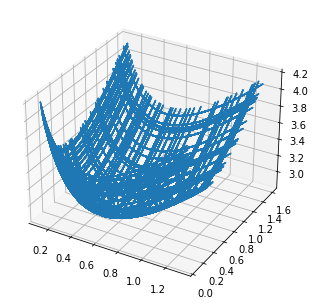

In [102]:
fig = figure()
ax = Axes3D(fig)
ax.plot_wireframe(proies,pred,Z);